## Notebook de Análisis Comparativo

### 1. Código de Carga y Gráficas Comparativas

En una nueva celda de código de su *notebook* de análisis:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ======================================================================
# DEFINICIÓN DE REFERENCIAS GLOBALES (Basado en T_REF_VALUES = [22.0, 21.0, 20.0, 19.0])
# ======================================================================

SALONES_EGT_MPC = [1, 2, 3, 4]
T_REF_DICT = {
    1: 22.0, 
    2: 21.0,
    3: 20.0, 
    4: 19.0,
    5: 22.0 # Referencia para el Salón 5 (ESC), asumiendo que es 22.0°C como Tref5
}
T_REF_ESC = 22.0 # Usado para la gráfica de ESC

# ----------------------------------------------------------------------
# 1. Carga de Datos
# ----------------------------------------------------------------------

try:
    path = './data/'
    # Cargar datos EGT
    df_egt = pd.read_csv(os.path.join(path, 'datos_simulacion_EGT.csv'))
    
    # Cargar datos MPC (se asume que se usó la configuración 'MPC ' para la comparativa)
    # Se corrige el nombre del archivo MPC a 'datos_simulacion_MPC_MPC_.csv' 
    # para usar el nombre completo generado anteriormente, asumiendo que es el archivo correcto.
    df_mpc = pd.read_csv(os.path.join(path, 'datos_simulacion_MPC.csv'))

    # Cargar datos ESC (es solo para un salón, el Salón 5 ficticio)
    df_esc = pd.read_csv(os.path.join(path, 'datos_simulacion_ESC.csv'))

except FileNotFoundError as e:
    print(f"Error al cargar archivos: {e}. Asegúrese de que los archivos CSV están en el directorio correcto.")
    # Usar exit() no es una buena práctica en notebooks, mejor reportar y detener la ejecución manual
    # Para ser más seguro en un notebook:
    raise FileNotFoundError(f"No se encontró el archivo: {e.filename}. Verifique los nombres y la ruta.")


# Tiempos en minutos
tiempo_min_egt = df_egt['Tiempo (horas)'] * 60
tiempo_min_mpc = df_mpc['Tiempo (horas)'] * 60
# El CSV de ESC tiene 'Tiempo (horas)', pero lo convertiremos de nuevo a minutos
tiempo_min_esc = df_esc['Tiempo (horas)'] * 60

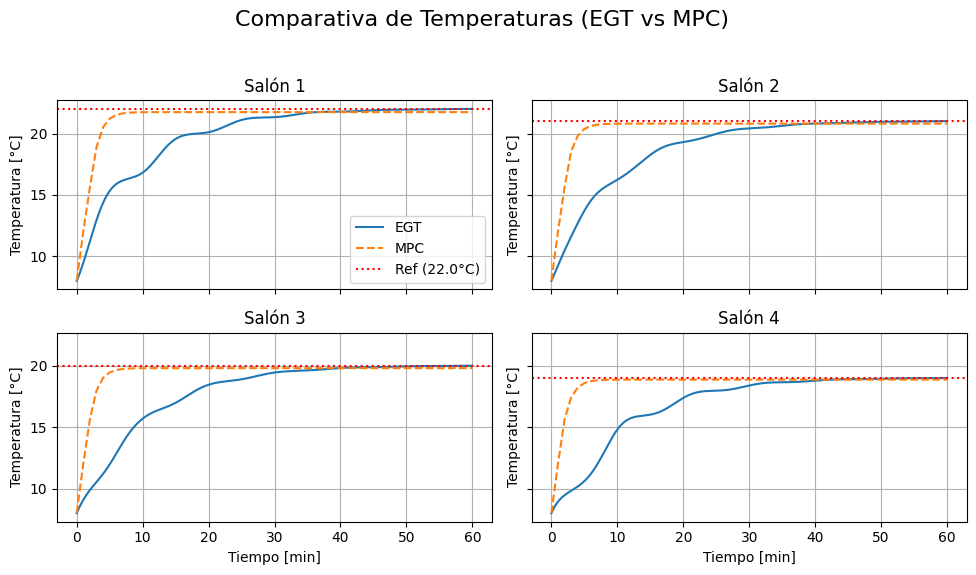

In [17]:
# ----------------------------------------------------------------------
# 2. Gráfica 1: Comparación de Temperaturas (EGT vs MPC)
# ----------------------------------------------------------------------

fig_T, axs_T = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
axs_T = axs_T.flatten()
fig_T.suptitle('Comparativa de Temperaturas (EGT vs MPC)', fontsize=16)

for i, salon in enumerate(SALONES_EGT_MPC):
    ax = axs_T[i]
    temp_col = f'Temperatura_Salon_{salon} (C)'
    
    # EGT
    ax.plot(tiempo_min_egt, df_egt[temp_col], label='EGT', linestyle='-')
    # MPC
    ax.plot(tiempo_min_mpc, df_mpc[temp_col], label='MPC', linestyle='--')
    
    # Referencia Global
    ref_val = T_REF_DICT[salon]
    ax.axhline(y=ref_val, color='r', linestyle=':', label=f'Ref ({ref_val}°C)')
    
    ax.set_title(f'Salón {salon}', fontsize=12)
    ax.set_ylabel('Temperatura [°C]')
    ax.grid(True)
    if i >= 2: # Solo mostrar el eje X en la fila inferior
        ax.set_xlabel('Tiempo [min]')

axs_T[0].legend(loc='lower right')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

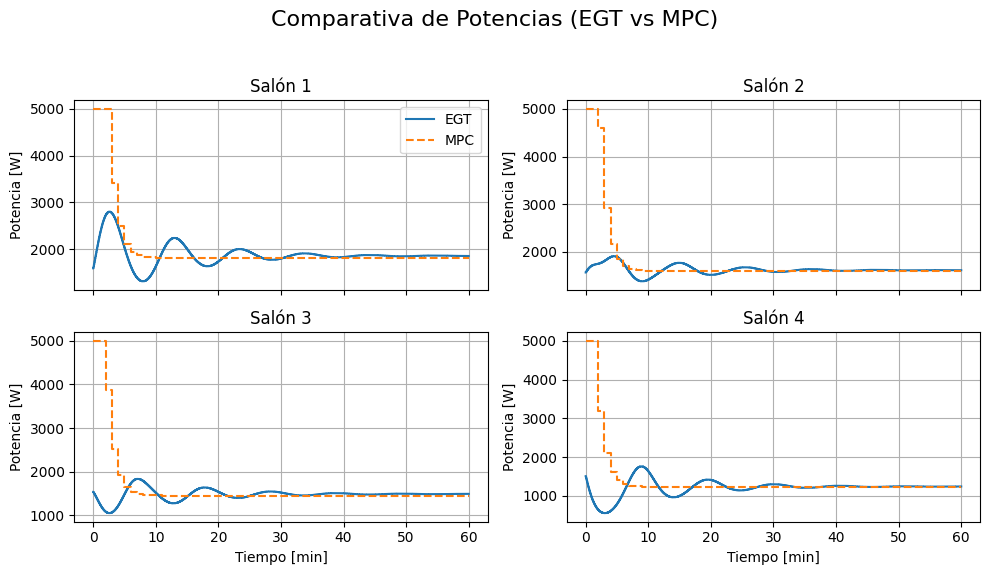

In [18]:
# ----------------------------------------------------------------------
# 3. Gráfica 2: Comparación de Potencias (EGT vs MPC)
# ----------------------------------------------------------------------

fig_U, axs_U = plt.subplots(2, 2, figsize=(10, 6), sharex=True)
axs_U = axs_U.flatten()
fig_U.suptitle('Comparativa de Potencias (EGT vs MPC)', fontsize=16)

for i, salon in enumerate(SALONES_EGT_MPC):
    ax = axs_U[i]
    pot_col = f'Potencia_Salon_{salon} (W)'
    
    # EGT (Potencia)
    ax.step(tiempo_min_egt, df_egt[pot_col], where='post', label='EGT', linestyle='-')
    # MPC (Potencia)
    ax.step(tiempo_min_mpc, df_mpc[pot_col], where='post', label='MPC', linestyle='--')
    
    ax.set_title(f'Salón {salon}', fontsize=12)
    ax.set_ylabel('Potencia [W]')
    ax.grid(True)
    if i >= 2: # Solo mostrar el eje X en la fila inferior
        ax.set_xlabel('Tiempo [min]')

axs_U[0].legend(loc='upper right')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

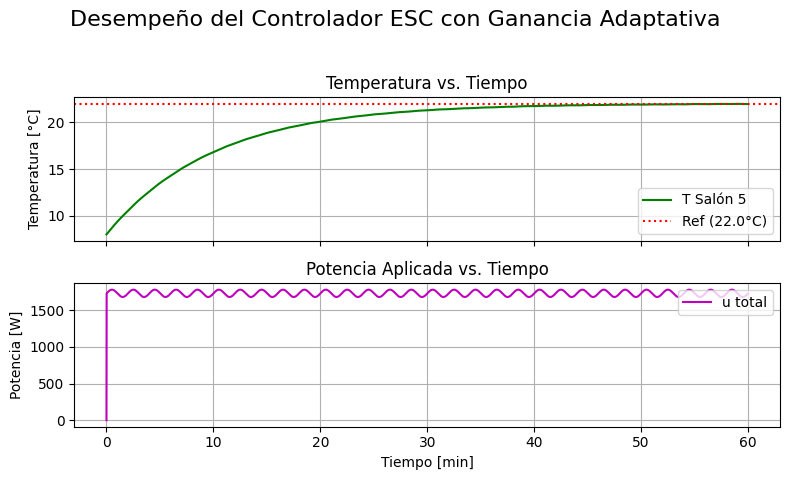

In [19]:
# ----------------------------------------------------------------------
# 4. Gráfica 3: Temperatura y Potencia para ESC Adaptativo (Salón 5)
# ----------------------------------------------------------------------

fig_ESC, axs_ESC = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
fig_ESC.suptitle('Desempeño del Controlador ESC con Ganancia Adaptativa', fontsize=16)

# Subplot 1: Temperatura
axs_ESC[0].plot(tiempo_min_esc, df_esc['Temperatura_Salon_5 (C)'], label='T Salón 5', color='g')
# Referencia Global
axs_ESC[0].axhline(y=T_REF_ESC, color='r', linestyle=':', label=f'Ref ({T_REF_ESC}°C)')
axs_ESC[0].set_title('Temperatura vs. Tiempo')
axs_ESC[0].set_ylabel('Temperatura [°C]')
axs_ESC[0].grid(True)
axs_ESC[0].legend(loc='lower right')

# Subplot 2: Potencia
axs_ESC[1].plot(tiempo_min_esc, df_esc['Potencia_Salon_5 (W)'], label='u total', color='m')
axs_ESC[1].set_title('Potencia Aplicada vs. Tiempo')
axs_ESC[1].set_ylabel('Potencia [W]')
axs_ESC[1].set_xlabel('Tiempo [min]')
axs_ESC[1].grid(True)
axs_ESC[1].legend(loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 2. Tabla Comparativa en Markdown

Análisis comparativo entre controladores.

# Resumen Comparativo de Métricas

Se presenta una comparación de las métricas de estado estacionario y eficiencia energética para las tres estrategias de control implementadas:

| Métrica | ESC (Adaptativo) | EGT | MPC |
| :--- | :--- | :--- | :--- |
| **Tiempo de Ejecución** | **211 ms** | 493 ms | 35.7 s |
| **Energía Total (1h)** | **6.23 MJ** | 22.32 MJ | 24.73 MJ |
| **Tiempo Est. Promedio (Ts)** | 33.68 min (Salón 5) | 45.2 min (Promedio Salones 1-4) | **5.8 min** (Promedio Salones 1-4) |
| **Error Est. Promedio ($\text{E}_{ss}$) (Media)** | $-0.0559 \text{ °C}$ (Salón 5) | $-0.01 \text{ °C}$ (Promedio Salones 1-4) | $**-0.19 \text{ °C}**$ (Promedio Salones 1-4) |
| **Potencia Est. Promedio ($\text{P}_{ss}$) (Media)** | $1729.51 \text{ W}$ (Salón 5) | $1552.3 \text{ W}$ (Promedio Salones 1-4) | $1521.8 \text{ W}$ (Promedio Salones 1-4) |
| **Amplitud Osc. ($\text{Amp}_{osc}$) (Media)** | $0.0330 \text{ °C}$ (Salón 5) | **$0.0000 \text{ °C}$** (Promedio Salones 1-4) | $0.00 \text{ °C}$ (Promedio Salones 1-4) |

<br>

## Desempeño por Salón (EGT y MPC)

| Salón | Métrica | EGT | MPC |
| :---: | :--- | :---: | :---: |
| **Salón 1** | $t_{est} \text{ [min]}$ | $44.80$ | $6.0$ |
| | $\text{P}_{ss} \text{ [W]}$ | $1855.2$ | $1814.8$ |
| | $\text{E}_{ss} \text{ [°C]}$ | $-0.01$ | $-0.25$ |
| **Salón 2** | $t_{est} \text{ [min]}$ | $45.71$ | $6.0$ |
| | $\text{P}_{ss} \text{ [W]}$ | $1611.8$ | $1592.1$ |
| | $\text{E}_{ss} \text{ [°C]}$ | $-0.01$ | $-0.19$ |
| **Salón 3** | $t_{est} \text{ [min]}$ | $46.25$ | $6.0$ |
| | $\text{P}_{ss} \text{ [W]}$ | $1490.8$ | $1451.4$ |
| | $\text{E}_{ss} \text{ [°C]}$ | $-0.01$ | $-0.19$ |
| **Salón 4** | $t_{est} \text{ [min]}$ | $43.96$ | $5.0$ |
| | $\text{P}_{ss} \text{ [W]}$ | $1242.3$ | $1228.7$ |
| | $\text{E}_{ss} \text{ [°C]}$ | $-0.00$ | $-0.12$ |